In [2]:
# import neessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN

In [77]:
df_wind_to_append = []

# Load and append data for each farm
for farm in [1, 2, 3, 4, 5]:
    
    wind_to_append = pd.read_csv(f"../data/wind/enlitia_wind_farm_{farm}_data.csv")
    wind_to_append['farm'] = farm  # Add a 'farm' column with the farm number
    df_wind_to_append.append(wind_to_append)

# Concatenate the DataFrames and reset index
df_wind = pd.concat(df_wind_to_append, ignore_index=True)

print("Wind DataFrame:\n", df_wind.head(),"\n")


Wind DataFrame:
    asset_id              read_at  wind_speed  wind_direction  power_average  \
0        11  2021-01-01 00:00:00         8.3           296.0          802.0   
1        11  2021-01-01 00:10:00         8.9           306.0          832.0   
2        11  2021-01-01 00:20:00         8.1           298.0          666.0   
3        11  2021-01-01 00:30:00         7.9           298.0          541.0   
4        11  2021-01-01 00:40:00         8.1           296.0          625.0   

   rotation_average  exterior_temperature  nacelle_temperature  farm  
0             15.51                  -2.0                  9.0     1  
1             15.74                  -2.0                  9.0     1  
2             14.88                  -2.0                 10.0     1  
3             14.03                  -2.0                 10.0     1  
4             14.64                  -2.0                 10.0     1   



In [4]:
df_wind.to_csv("intermediate/wind/df_wind.csv")

In [5]:
df_wind.shape

(8367759, 9)

In [6]:
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367759 entries, 0 to 8367758
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   asset_id              int64  
 1   read_at               object 
 2   wind_speed            float64
 3   wind_direction        float64
 4   power_average         float64
 5   rotation_average      float64
 6   exterior_temperature  float64
 7   nacelle_temperature   float64
 8   farm                  int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 574.6+ MB


In [8]:
print(f"Head of Wind df: \n {df_wind.head()} \n")
print(f"Tail of Wind df: \n {df_wind.tail()} \n")

Head of Wind df: 
    asset_id              read_at  wind_speed  wind_direction  power_average  \
0        11  2021-01-01 00:00:00         8.3           296.0          802.0   
1        11  2021-01-01 00:10:00         8.9           306.0          832.0   
2        11  2021-01-01 00:20:00         8.1           298.0          666.0   
3        11  2021-01-01 00:30:00         7.9           298.0          541.0   
4        11  2021-01-01 00:40:00         8.1           296.0          625.0   

   rotation_average  exterior_temperature  nacelle_temperature  farm  
0             15.51                  -2.0                  9.0     1  
1             15.74                  -2.0                  9.0     1  
2             14.88                  -2.0                 10.0     1  
3             14.03                  -2.0                 10.0     1  
4             14.64                  -2.0                 10.0     1   

Tail of Wind df: 
          asset_id              read_at  wind_speed  wind_di

In [7]:
print(f"Number of assets for Wind df: {df_wind['asset_id'].nunique()} \n")

Number of assets for Wind df: 71 



In [20]:
df_wind.describe()

,asset_id,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
count,8.367759e+06,8.367759e+06,8.367759e+06,8.367759e+06,8.367759e+06,8.367758e+06,8.367758e+06,8.367759e+06
mean,1.297044e+02,6.146998e+00,1.008878e+02,5.743852e+02,1.100961e+01,1.243242e+01,2.140831e+01,2.929581e+00
std,1.504828e+02,3.270634e+00,3.020807e+02,6.570261e+02,4.684451e+00,7.089474e+00,8.012069e+00,1.407463e+00
min,1.100000e+01,-8.970000e+00,-1.070000e+03,-1.818000e+01,0.000000e+00,-4.499000e+01,-3.789000e+01,1.000000e+00
25%,2.900000e+01,3.800000e+00,-1.090000e+02,6.700000e+01,7.790000e+00,7.000000e+00,1.600000e+01,2.000000e+00
50%,4.900000e+01,5.700000e+00,1.150000e+02,2.890000e+02,1.118000e+01,1.102000e+01,2.100000e+01,3.000000e+00
75%,2.100000e+02,8.000000e+00,3.140000e+02,8.800000e+02,1.487000e+01,1.700000e+01,2.700000e+01,4.000000e+00
max,5.120000e+02,3.270000e+01,1.058000e+03,2.366000e+03,1.880000e+01,1.170000e+02,1.240000e+02,5.000000e+00


In [ ]:
print(f"Duplicated values for the Wind df: {df_wind[df_wind.duplicated()]}")

Duplicated values for the Wind df: Empty DataFrame
Columns: [asset_id, read_at, wind_speed, wind_direction, power_average, rotation_average, exterior_temperature, nacelle_temperature, farm]
Index: []


In [21]:
print(f"NAs count for Wind")
print(df_wind.isna().sum(), "\n")

NAs count for Wind
asset_id                0
read_at                 0
wind_speed              0
wind_direction          0
power_average           0
rotation_average        0
exterior_temperature    1
nacelle_temperature     1
farm                    0
dtype: int64 



In [22]:
df_wind[df_wind["exterior_temperature"].isna()]

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
1043621,19,2022-12-01 21:00:00,12.5,-273.0,1962.0,17.8,NaN,NaN,1


#### Fill NA's

Fill NA's with the median of the median of the values for the same day and month at the same time, for the same asset. 

In [23]:
df_wind['read_at'] = pd.to_datetime(df_wind['read_at'])
filtered_df = df_wind[(df_wind['asset_id'] == 19) & 
                 (df_wind['read_at'].dt.time == pd.to_datetime('21:00:00').time()) & 
                 (df_wind['read_at'].dt.month == 12) & 
                 (df_wind['read_at'].dt.day == 1)] 
filtered_df

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
991062,19,2021-12-01 21:00:00,12.0,-52.0,2047.0,17.97,2.0,5.0,1
1043621,19,2022-12-01 21:00:00,12.5,-273.0,1962.0,17.80,NaN,NaN,1


In [24]:
df_wind.loc[df_wind["exterior_temperature"].isna(), "exterior_temperature"] = filtered_df["exterior_temperature"].median()
df_wind.loc[df_wind["nacelle_temperature"].isna(), "nacelle_temperature"] = filtered_df["nacelle_temperature"].median()

In [25]:
df_wind[(df_wind['asset_id'] == 19) & 
                 (df_wind['read_at'].dt.time == pd.to_datetime('21:00:00').time()) & 
                 (df_wind['read_at'].dt.month == 12) & 
                 (df_wind['read_at'].dt.day == 1)] 

,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
991062,19,2021-12-01 21:00:00,12.0,-52.0,2047.0,17.97,2.0,5.0,1
1043621,19,2022-12-01 21:00:00,12.5,-273.0,1962.0,17.80,2.0,5.0,1


### Check distribution

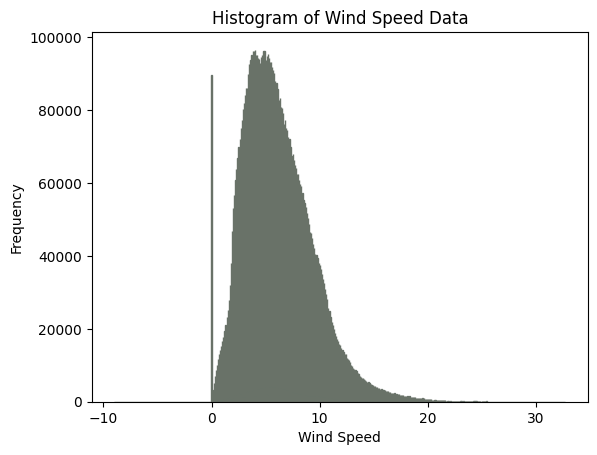

In [17]:
# Assuming df_wind is your DataFrame containing wind data
# Plotting the histogram
plt.hist(df_wind["wind_speed"], bins=len(df_wind["wind_speed"].unique()), edgecolor='#697268')  
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Wind Speed Data')
plt.grid(False)
plt.show()


### Check multicolinearity

In [3]:
filtered_df_wind = df_wind.iloc[:, 2:-1]
print(filtered_df_wind.columns)

filtered_df_wind.to_csv("intermediate/wind/filtered_df_wind.csv")

Index(['wind_speed', 'wind_direction', 'power_average', 'rotation_average',
       'exterior_temperature', 'nacelle_temperature'],
      dtype='object')


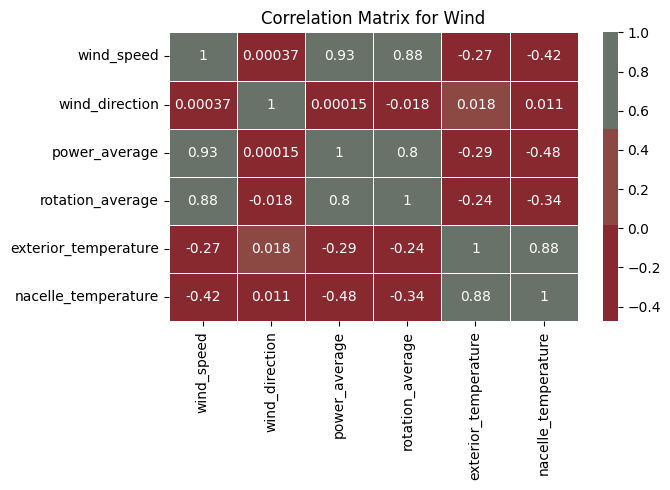

In [35]:
# Calculate the correlation matrix
my_colors = ['#88292F', '#8C4843', '#697268']
sns.set_palette(my_colors)


corr_matrix = filtered_df_wind.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(7, 5))
sns.heatmap(corr_matrix, annot=True, cmap=my_colors, linewidths=0.5)
plt.title(f'Correlation Matrix for Wind')
plt.tight_layout()
plt.show()

Explore variables with the highest relation with power average:

Wind speed vs power average;

And rotation average vs power average;

NOTE: A nacelle is a cover housing that houses all of the generating components in a wind turbine, including the generator, gearbox, drive train, and brake assembly.

# Outliers


Boxplots for the Wind df:


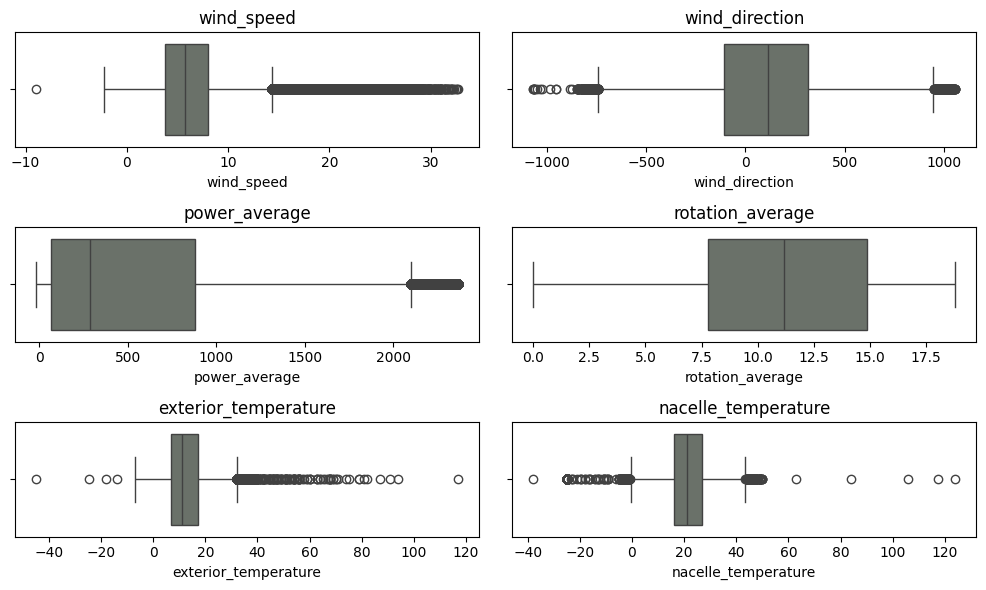

In [29]:

print(f"\nBoxplots for the Wind df:")
num_cols = len(filtered_df_wind.columns)
num_rows = (num_cols + 1) // 2  
fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows*2))

axes = axes.flatten()

for i, feature in enumerate(filtered_df_wind.columns):
    if i < num_cols:  
        sns.boxplot(x=filtered_df_wind[feature], color='#697268', ax=axes[i])
        axes[i].set_title(feature)  
plt.tight_layout() 
plt.show()


In [41]:
print(f"Number of values with wind speed below 0: {len(df_wind[df_wind['wind_speed']<0])}")
df_wind.loc[df_wind["wind_speed"]<0]

Number of values with wind speed below 0: 13


,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
7299040,53,2023-02-02 18:50:00,-0.06,100.83,-1.25,0.30,8.77,16.74,5
7589194,56,2021-11-19 09:50:00,-8.97,18.34,-0.23,0.22,8.40,16.24,5
7594951,56,2021-12-29 09:20:00,-0.02,202.73,-1.42,0.07,11.46,24.18,5
7595000,56,2021-12-29 17:30:00,-0.37,243.34,-0.01,0.00,12.28,18.97,5
7595047,56,2021-12-30 01:20:00,-0.03,122.41,54.32,3.57,12.12,19.44,5
7595423,56,2022-01-01 16:00:00,-2.27,181.78,-1.24,0.25,16.80,24.59,5
7595546,56,2022-01-02 12:30:00,-0.60,244.72,8.80,2.81,11.80,22.66,5
7595567,56,2022-01-02 16:00:00,-0.90,243.34,-0.11,0.00,13.60,21.76,5
7595601,56,2022-01-02 21:40:00,-0.60,172.00,0.00,0.00,12.20,16.92,5
7595603,56,2022-01-02 22:00:00,-0.40,172.00,-0.13,0.00,12.20,16.93,5


In [31]:
print(f"Number of values with wind speed equal to 0: {len(df_wind[df_wind['wind_speed']==0])}")
df_wind.loc[df_wind["wind_speed"]==0]

Number of values with wind speed equal to 0: 89696


,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
11924,11,2021-03-24 19:20:00,0.0,0.0,0.0,0.0,4.0,18.0,1
11926,11,2021-03-24 19:40:00,0.0,0.0,0.0,0.0,3.0,16.0,1
11927,11,2021-03-24 19:50:00,0.0,0.0,0.0,0.0,3.0,16.0,1
11928,11,2021-03-24 20:00:00,0.0,0.0,0.0,0.0,3.0,16.0,1
11929,11,2021-03-24 20:10:00,0.0,0.0,0.0,0.0,3.0,16.0,1
...,...,...,...,...,...,...,...,...,...
8365631,512,2023-03-15 16:00:00,0.0,0.0,0.0,0.0,0.0,0.0,5
8365632,512,2023-03-15 16:10:00,0.0,0.0,0.0,0.0,0.0,0.0,5
8365633,512,2023-03-15 16:20:00,0.0,0.0,0.0,0.0,0.0,0.0,5
8365634,512,2023-03-15 16:30:00,0.0,0.0,0.0,0.0,0.0,0.0,5


In [51]:
out_of_range_rows = df_wind[(df_wind['wind_direction'] < -365) | (df_wind['wind_direction'] > 365)]

print(f"Number of values with wind direction equal to 0: {len(out_of_range_rows)}")
out_of_range_rows

Number of values with wind direction equal to 0: 2230573


,asset_id,read_at,wind_speed,wind_direction,power_average,rotation_average,exterior_temperature,nacelle_temperature,farm
220,11,2021-01-02 12:40:00,2.0,389.0,0.0,1.18,5.0,19.0,1
221,11,2021-01-02 12:50:00,1.9,374.0,0.0,3.35,5.0,19.0,1
222,11,2021-01-02 13:00:00,2.1,376.0,1.0,5.06,5.0,20.0,1
231,11,2021-01-02 14:30:00,1.1,408.0,0.0,0.12,5.0,21.0,1
232,11,2021-01-02 14:40:00,1.1,403.0,0.0,0.07,6.0,22.0,1
...,...,...,...,...,...,...,...,...,...
6953268,415,2023-03-28 22:10:00,7.4,555.0,705.0,14.82,17.0,25.0,4
6953269,415,2023-03-28 22:20:00,7.3,555.0,648.0,14.68,17.0,25.0,4
6953270,415,2023-03-28 22:30:00,6.9,553.0,584.0,14.15,17.0,25.0,4
6953271,415,2023-03-28 22:40:00,7.4,562.0,653.0,14.39,17.0,25.0,4


In [78]:
# Create a boolean mask indicating rows where wind_direction is outside the range (-365, 365)
out_of_range_rows = (df_wind['wind_direction'] < -365) | (df_wind['wind_direction'] > 365) | (df_wind['wind_speed']<=0)

# Filter the DataFrame df_wind to keep only the rows where wind_direction is within the range
df_wind = df_wind[~out_of_range_rows].reset_index(drop=True)

# Print the filtered DataFrame
print(f"New length of wind df: {len(df_wind)} \n {df_wind}")


New length of wind df: 6047675 
          asset_id              read_at  wind_speed  wind_direction  \
0              11  2021-01-01 00:00:00         8.3           296.0   
1              11  2021-01-01 00:10:00         8.9           306.0   
2              11  2021-01-01 00:20:00         8.1           298.0   
3              11  2021-01-01 00:30:00         7.9           298.0   
4              11  2021-01-01 00:40:00         8.1           296.0   
...           ...                  ...         ...             ...   
6047670       512  2023-03-30 09:50:00        10.7           224.0   
6047671       512  2023-03-30 10:00:00         9.7           224.0   
6047672       512  2023-03-30 10:10:00         9.2           224.0   
6047673       512  2023-03-30 10:20:00         7.3           224.0   
6047674       512  2023-03-30 10:30:00         7.4           233.0   

         power_average  rotation_average  exterior_temperature  \
0               802.00             15.51                  -2

should wind speed below 0 be removed?

what about wind direction?

wind speed vs power average

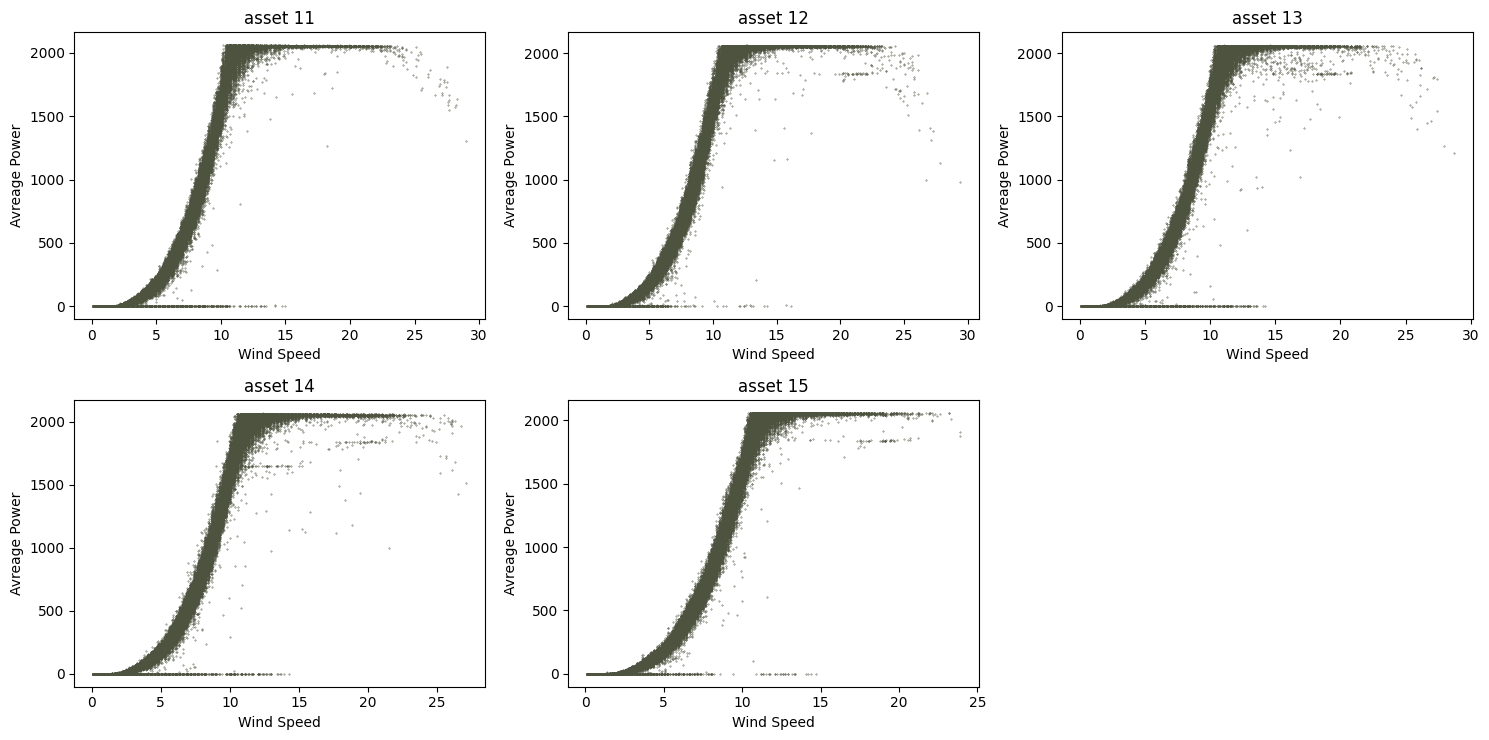

In [79]:
plot = 1
assets = df_wind["asset_id"].unique()[:5]
n_plots = 5
plt.figure(figsize=(n_plots*3, n_plots*1.5))
for asset, subset in df_wind[df_wind["asset_id"].isin(assets)].groupby("asset_id"):
    plt.subplot(2, 3, plot)
    plt.title(f"asset {asset}")
    plt.xlabel('Wind Speed')
    plt.ylabel('Avreage Power')
    plt.scatter(subset["wind_speed"], subset["power_average"], c="#4E5340", s=0.1)
    plot += 1
plt.tight_layout()
plt.show()

In [80]:
len(df_wind[df_wind["power_average"]==0])

295800

In [82]:
boolean_mask = df_wind["power_average"]==0
df_wind = df_wind[~boolean_mask]

In [83]:
len(df_wind[df_wind["power_average"]==0])

0

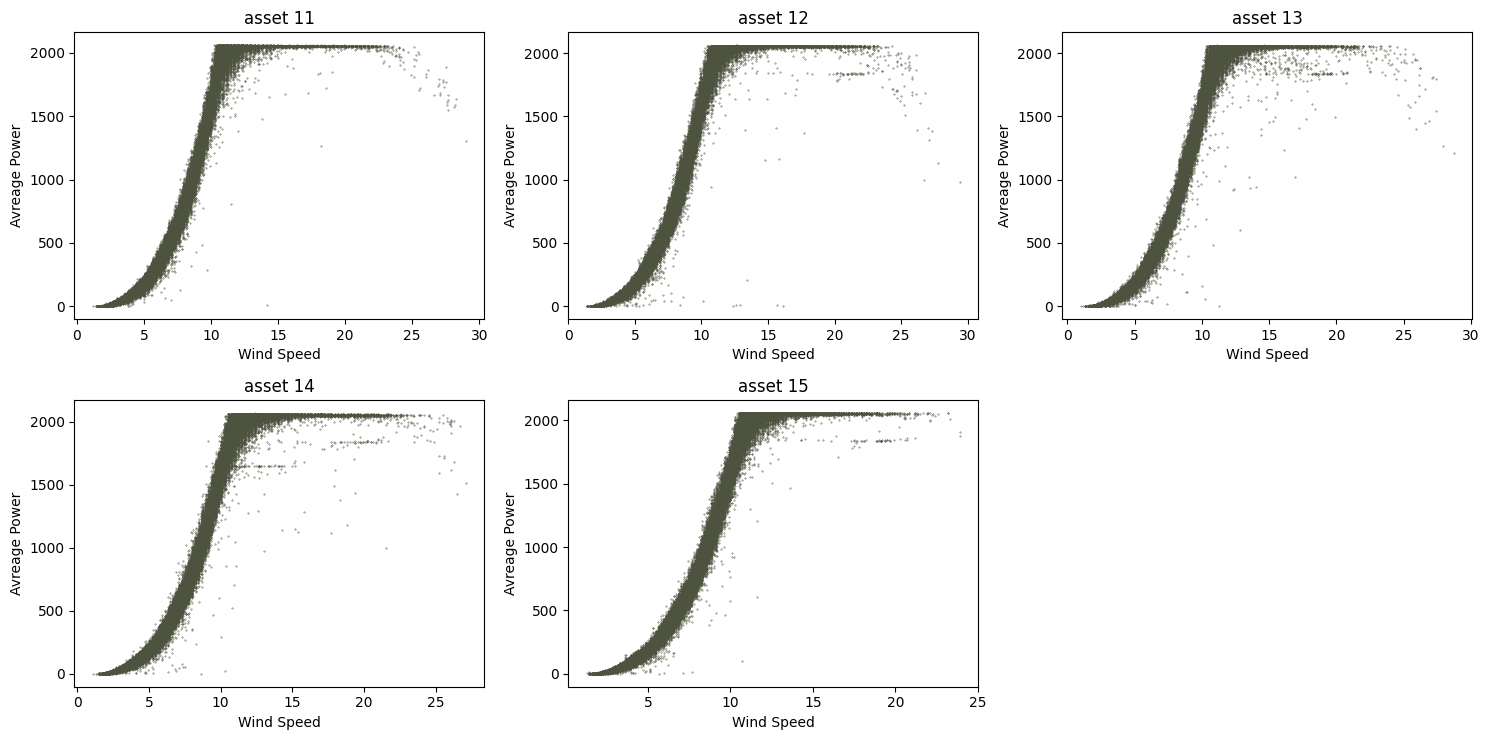

In [84]:
plot = 1
assets = df_wind["asset_id"].unique()[:5]
n_plots = 5
plt.figure(figsize=(n_plots*3, n_plots*1.5))
for asset, subset in df_wind[df_wind["asset_id"].isin(assets)].groupby("asset_id"):
    plt.subplot(2, 3, plot)
    plt.title(f"asset {asset}")
    plt.xlabel('Wind Speed')
    plt.ylabel('Avreage Power')
    plt.scatter(subset["wind_speed"], subset["power_average"], c="#4E5340", s=0.1)
    plot += 1
plt.tight_layout()
plt.show()

test the DBSCAN method to identify outliers:

Number of outliers for Asset 11: 2904
Number of outliers for Asset 12: 2372
Number of outliers for Asset 13: 3131
Number of outliers for Asset 14: 2759
Number of outliers for Asset 15: 2355


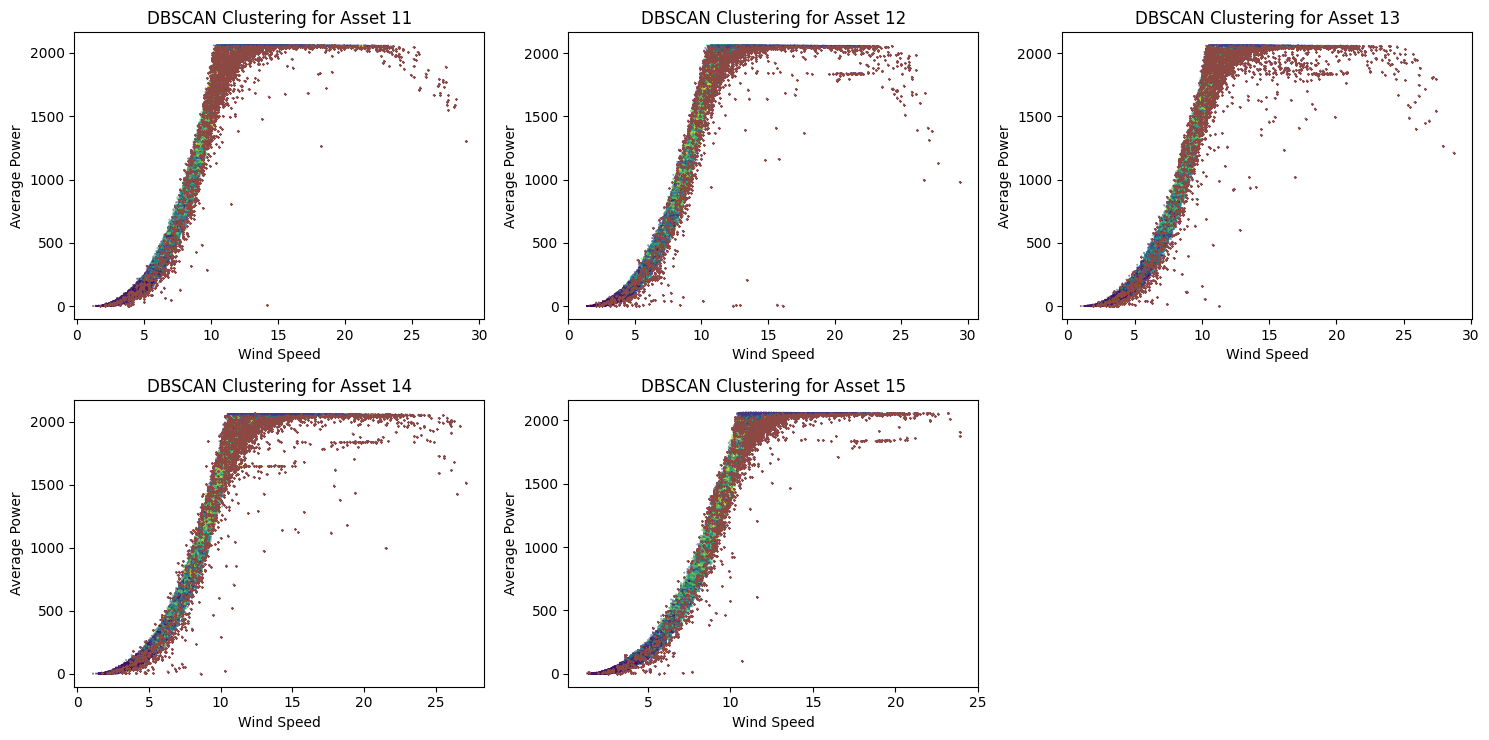

In [85]:
# Define the DBSCAN parameters
eps = 0.3
min_samples = 5

n_plots = 5

plt.figure(figsize=(n_plots*3, n_plots*1.5))

# Iterate over the first 5 assets
for plot, asset_id in enumerate(df_wind['asset_id'].unique()[:n_plots], start=1):
    # Filter the data for the current asset
    filtered_data = df_wind[df_wind['asset_id'] == asset_id][['wind_speed', 'power_average']]

    # Create the DBSCAN model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit the model to the data
    dbscan.fit(filtered_data)

    # Get the labels of the data points
    labels = dbscan.labels_

    # Identify the outliers
    outliers = np.where(labels == -1)[0]

    # Print the number of outliers
    print(f"Number of outliers for Asset {asset_id}:", len(outliers))

    plt.subplot(2, 3, plot)

    # Plot the data with the outliers highlighted
    plt.scatter(filtered_data['wind_speed'], filtered_data['power_average'], c=labels, label = "Remaining Points" , s=0.1)
    plt.scatter(filtered_data.iloc[outliers, 0], filtered_data.iloc[outliers, 1], c="#8C4843", marker="x", label = "Outlier",s=1)
    plt.title(f'DBSCAN Clustering for Asset {asset_id}')
    plt.xlabel('Wind Speed')
    plt.ylabel('Average Power')

# Adjust layout and show plot
plt.tight_layout()
plt.show()



Mean square deviation method:

/tmp/ipykernel_4196/4097594286.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_wind.groupby([wind_speed_intervals, "asset_id"])
/tmp/ipykernel_4196/4097594286.py:16: RuntimeWarning: invalid value encountered in scalar divide
  mean_square_deviation = np.sqrt(((group_df['power_average'] - mean_power) ** 2).sum() / (n - 1))


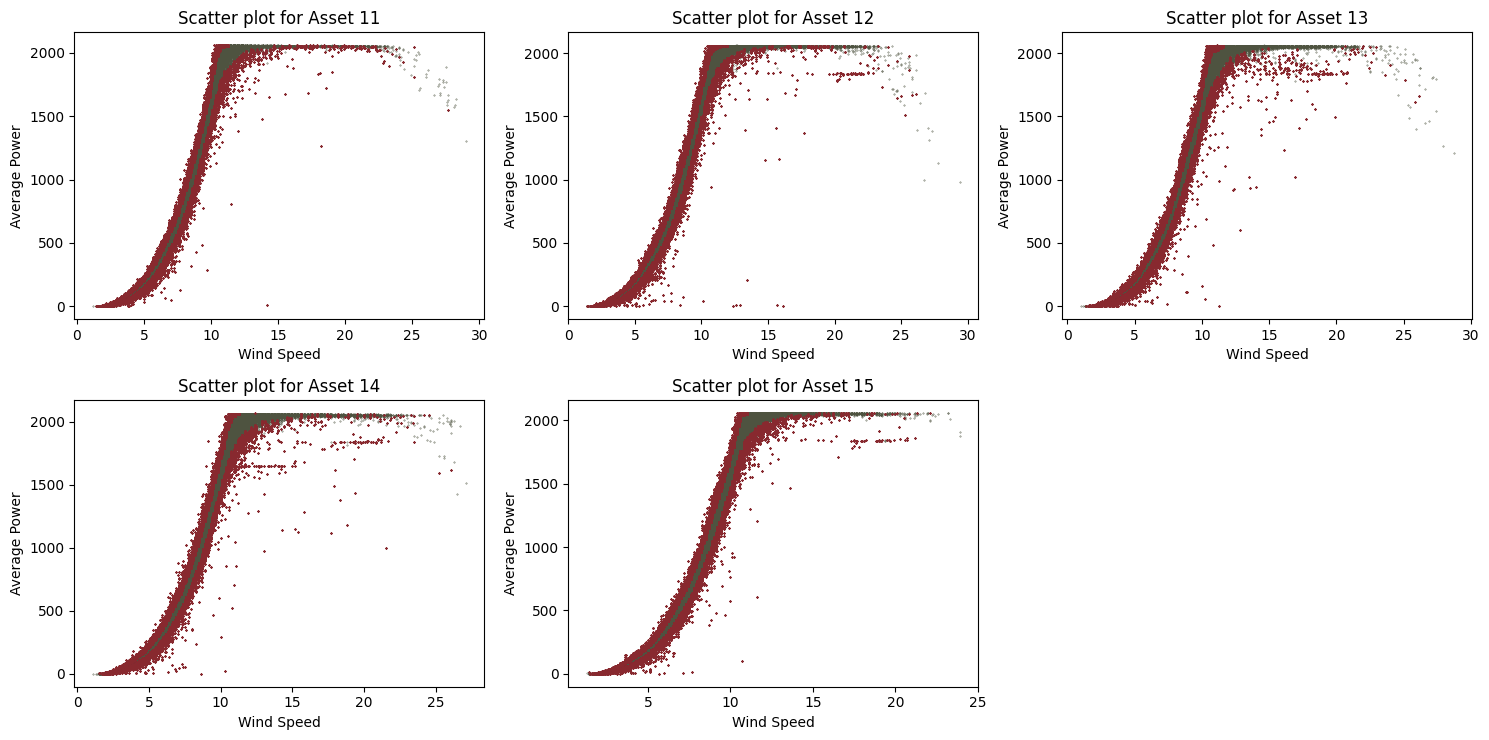

In [89]:
# Create an empty list to store outliers for each asset
outliers_list = []

n_plots = 5

plt.figure(figsize=(n_plots*3, n_plots*1.5))

# Group the data by wind speed intervals
wind_speed_intervals = pd.cut(df_wind['wind_speed'], bins=np.arange(0, df_wind['wind_speed'].max() + 0.1, 0.1))
grouped_df = df_wind.groupby([wind_speed_intervals, "asset_id"])

for (wind_speed_interval, asset_id), group_df in grouped_df:
    # Calculate mean power and within-group mean square deviation
    mean_power = group_df['power_average'].mean()
    n = len(group_df)
    mean_square_deviation = np.sqrt(((group_df['power_average'] - mean_power) ** 2).sum() / (n - 1))
    
    # Select the mean square deviation multiplier
    mean_sq_dev_multiplier = 1
    
    # Threshold for identifying outliers
    threshold = mean_sq_dev_multiplier * mean_square_deviation

    # Filter out outliers
    outliers = group_df[(group_df['power_average'] - mean_power).abs() > threshold]

    # Append outliers for each asset to the outliers list
    outliers_list.append(outliers)

# Plot the data points with outliers in a different color
inliers_df = df_wind.drop(pd.concat(outliers_list).index)

# Iterate over the first 5 assets
for i, asset_id in enumerate(assets, 1):
    plt.subplot(2, 3, i)
    asset_inliers = inliers_df[inliers_df["asset_id"] == asset_id]
    asset_outliers = pd.concat([outliers[outliers["asset_id"] == asset_id] for outliers in outliers_list])
    
    plt.scatter(asset_inliers["wind_speed"], asset_inliers["power_average"], c="#4E5340", s=0.1)
    plt.scatter(asset_outliers["wind_speed"], asset_outliers["power_average"], c="#88292F", s=1, marker="x")
    
    plt.title(f'Scatter plot for Asset {asset_id}')
    plt.xlabel('Wind Speed')
    plt.ylabel('Average Power')
    #plt.legend(['Inliers', 'Outliers'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()


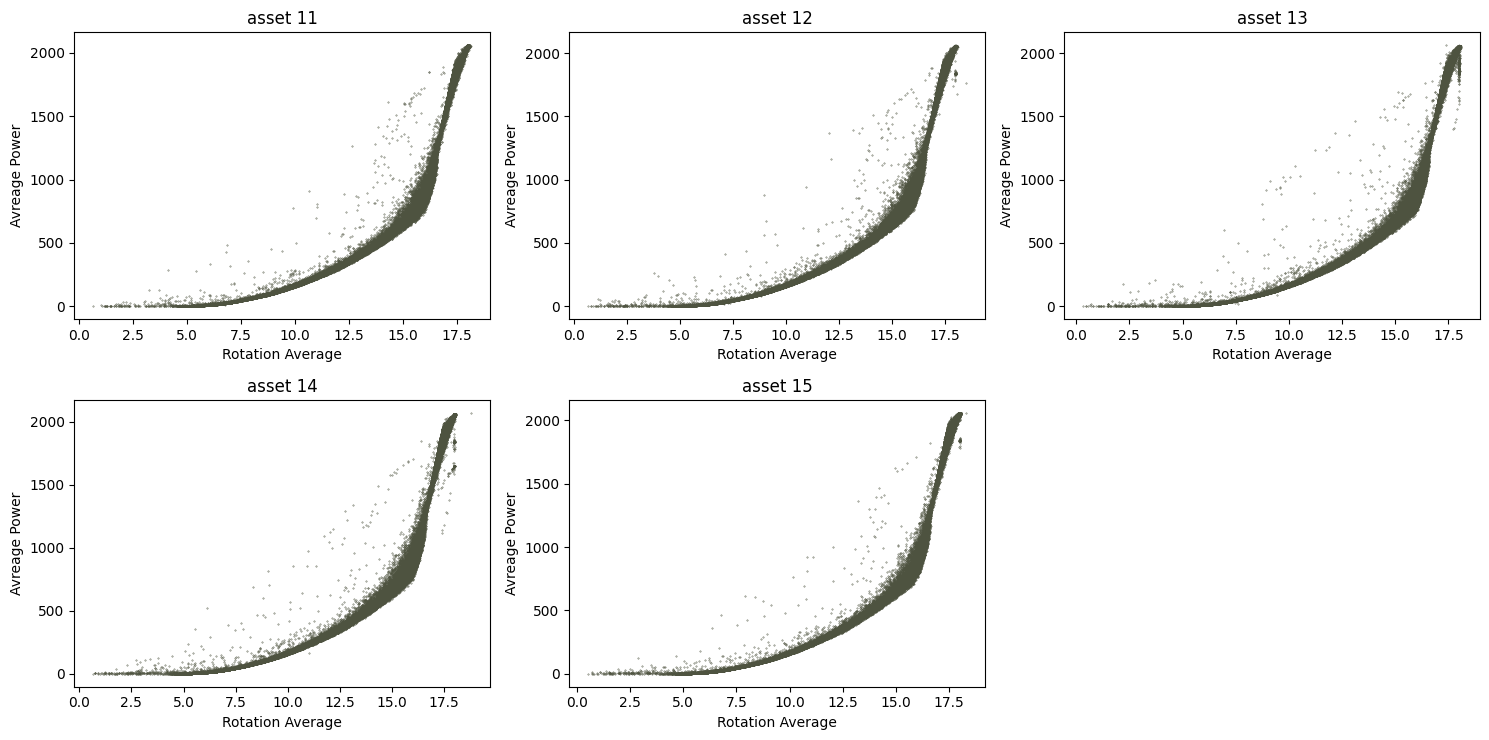

In [87]:
plot = 1
assets = df_wind["asset_id"].unique()[:5]
n_plots = 5
plt.figure(figsize=(n_plots*3, n_plots*1.5))
for asset, subset in df_wind[df_wind["asset_id"].isin(assets)].groupby("asset_id"):
    plt.subplot(2, 3, plot)
    plt.title(f"asset {asset}")
    plt.xlabel('Rotation Average')
    plt.ylabel('Avreage Power')
    plt.scatter(subset["rotation_average"], subset["power_average"], c="#4E5340", s=0.1)
    plot += 1
plt.tight_layout()
plt.show()

/tmp/ipykernel_4196/2443792589.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df_wind.groupby([rotation_average_intervals, "asset_id"])
/tmp/ipykernel_4196/2443792589.py:16: RuntimeWarning: invalid value encountered in scalar divide
  mean_square_deviation = np.sqrt(((group_df['power_average'] - mean_power) ** 2).sum() / (n - 1))


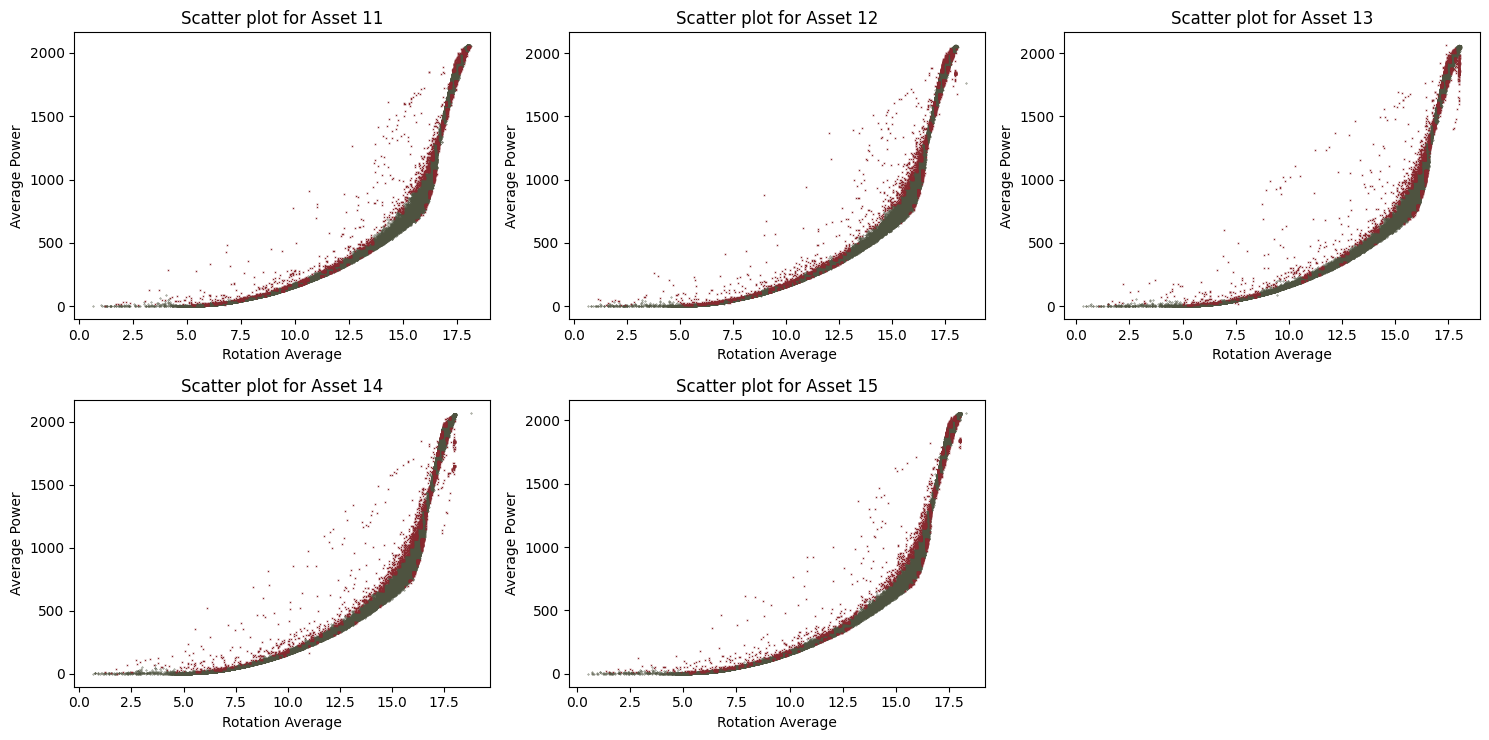

In [88]:
# Create an empty list to store outliers for each asset
outliers_list = []

n_plots = 5

plt.figure(figsize=(n_plots*3, n_plots*1.5))

# Group the data by wind speed intervals
rotation_average_intervals = pd.cut(df_wind['rotation_average'], bins=np.arange(0, df_wind['rotation_average'].max() + 0.2, 0.2))
grouped_df = df_wind.groupby([rotation_average_intervals, "asset_id"])

for (rotation_average_interval, asset_id), group_df in grouped_df:
    # Calculate mean power and within-group mean square deviation
    mean_power = group_df['power_average'].mean()
    n = len(group_df)
    mean_square_deviation = np.sqrt(((group_df['power_average'] - mean_power) ** 2).sum() / (n - 1))
    
    # Select the mean square deviation multiplier
    mean_sq_dev_multiplier = 1.5
    
    # Threshold for identifying outliers
    threshold = mean_sq_dev_multiplier * mean_square_deviation

    # Filter out outliers
    outliers = group_df[(group_df['power_average'] - mean_power).abs() > threshold]

    # Append outliers for each asset to the outliers list
    outliers_list.append(outliers)

# Plot the data points with outliers in a different color
inliers_df = df_wind.drop(pd.concat(outliers_list).index)

# Iterate over the first 5 assets
for i, asset_id in enumerate(assets, 1):
    plt.subplot(2, 3, i)
    asset_inliers = inliers_df[inliers_df["asset_id"] == asset_id]
    asset_outliers = pd.concat([outliers[outliers["asset_id"] == asset_id] for outliers in outliers_list])
    
    plt.scatter(asset_inliers["rotation_average"], asset_inliers["power_average"], c="#4E5340", s=0.1)
    plt.scatter(asset_outliers["rotation_average"], asset_outliers["power_average"], c="#88292F", s=0.1, marker="x")
    
    plt.title(f'Scatter plot for Asset {asset_id}')
    plt.xlabel('Rotation Average')
    plt.ylabel('Average Power')
    #plt.legend(['Inliers', 'Outliers'])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

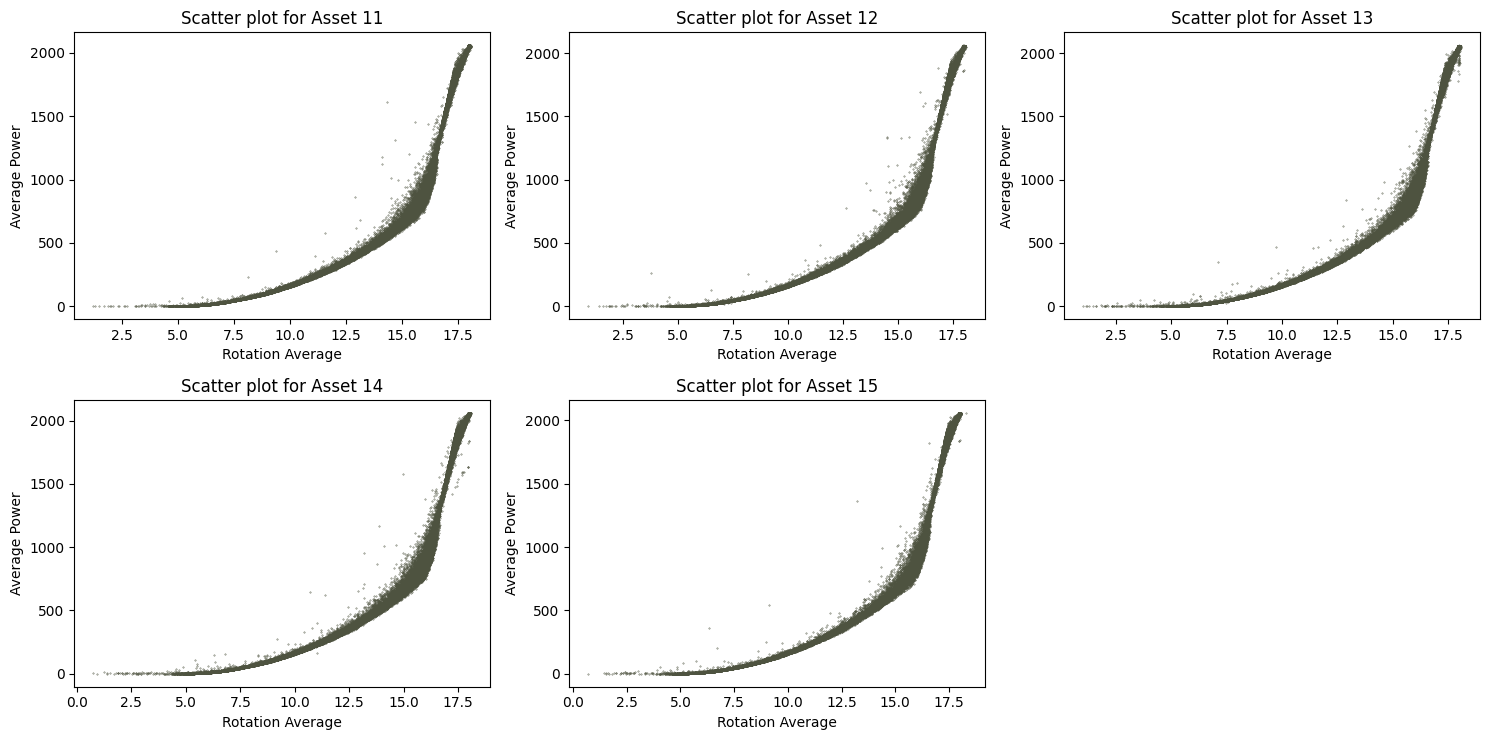

In [93]:
n_plots = 5

plt.figure(figsize=(n_plots*3, n_plots*1.5))

# Iterate over the first 5 assets
for i, asset_id in enumerate(assets, 1):
    plt.subplot(2, 3, i)
    asset_inliers = inliers_df[inliers_df["asset_id"] == asset_id]
    
    plt.scatter(asset_inliers["rotation_average"], asset_inliers["power_average"], c="#4E5340", s=0.1)
    
    plt.title(f'Scatter plot for Asset {asset_id}')
    plt.xlabel('Rotation Average')
    plt.ylabel('Average Power')


# Adjust layout and show plot
plt.tight_layout()
plt.show()